In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# df = pd.read_csv("final3.csv")
df = pd.read_csv("final7.csv")

In [3]:
df = df.rename(columns={'Unnamed: 0': 'disease_name'})

In [4]:
df.head()

disease_name  mild_blurred_vision  dark_stool  discharge_from_eyes  \
0    arthritis                    0           0                    0   
1    arthritis                    0           0                    0   
2    arthritis                    0           0                    0   
3    arthritis                    0           0                    0   
4    arthritis                    0           0                    0   

   irritating_cough  swollen_skin_around_sores  running_nose  headache  \
0                 0                          0             0         0   
1                 0                          0             0         0   
2                 0                          0             0         0   
3                 0                          0             0         0   
4                 0                          0             0         0   

   irritability  pain_in_gum  ...  fever  itchy_skin  watery_diarrhoea  \
0             0            0  ...      0           0                 0   
1             0            0  ...      0           0                 0   
2             0            0  ...      0           0                 0   
3             0            0  ...      0           0                 0   
4             0            0  ...      0           0                 0   

   mood_swings  oiliness_of_skin  vomiting  bleeding_gums  inflammatory_nails  \
0            0                 0         0              0                   0   
1            0                 0         0              0                   0   
2            0                 0         0              0                   0   
3            0                 0         0              0                   0   
4            0                 0         0              0                   0   

   muscle_weakness  disturbance_in_vision  
0                0                      0  
1                1                      0  
2                0                      0  
3                0                      0  
4                0                      0  

[5 rows x 172 columns]

In [5]:
df.shape

(4267, 172)

In [6]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [7]:
df.head(30)

disease_name  mild_blurred_vision  dark_stool  \
0                   labyrinthitis                    0           0   
1                    tubercolosis                    0           0   
2                            acne                    0           0   
3                     tonsillitis                    0           0   
4   alcohol_related_liver_disease                    0           0   
5                 gastroenteritis                    0           0   
6                           mumps                    0           0   
7                       dry mouth                    0           0   
8                         vertigo                    0           0   
9                           mumps                    0           0   
10                           acne                    0           0   
11                          mumps                    0           0   
12                   hypertension                    0           0   
13                   constipation                    0           0   
14                   tubercolosis                    0           0   
15                        malaria                    0           0   
16                       covid-19                    0           0   
17  alcohol_related_liver_disease                    0           0   
18                   tubercolosis                    0           0   
19                gastroenteritis                    0           0   
20                       jaundice                    0           0   
21                    tonsillitis                    0           0   
22                gastroenteritis                    0           0   
23                           acne                    0           0   
24                 stomach_ulcers                    0           1   
25                       covid-19                    0           0   
26                        malaria                    0           0   
27                   hypertension                    0           0   
28                   hypertension                    0           0   
29                        typhoid                    0           0   

    discharge_from_eyes  irritating_cough  swollen_skin_around_sores  \
0                     0                 0                          0   
1                     0                 0                          0   
2                     0                 0                          0   
3                     0                 0                          0   
4                     0                 0                          0   
5                     0                 0                          0   
6                     0                 0                          0   
7                     0                 0                          0   
8                     0                 0                          0   
9                     0                 0                          0   
10                    0                 0                          0   
11                    0                 0                          0   
12                    0                 0                          0   
13                    0                 0                          0   
14                    0                 0                          0   
15                    0                 0                          0   
16                    0                 0                          0   
17                    0                 0                          0   
18                    0                 0                          0   
19                    0                 0                          0   
20                    0                 0                          0   
21                    0                 0                          0   
22                    0                 0                          0   
23                    0                 0                          0   
24                    0                 0         

In [8]:
X = df.iloc[:, 1:]
y = df.iloc[:, :1]

In [9]:
y.value_counts()

disease_name                 
acne                             255
sinusitis                        255
alcohol_related_liver_disease    255
hypertension                     255
jaundice                         255
gastroenteritis                  255
mumps                            255
malaria                          255
stomach_ulcers                   127
constipation                     127
covid-19                         127
labyrinthitis                    127
tubercolosis                     127
hyperthyroidism                  127
typhoid                          127
food_posioning                   127
mouth ulcers                      63
tonsillitis                       63
indigestion                       63
urinary_tract_infection           63
vertigo                           63
chicken_pox                       63
allergy                           63
dry mouth                         63
diarrhoea                         63
dental abscess                    63
dengue  

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)


In [12]:
X_train.shape, X_test.shape

((3200, 171), (1067, 171))

In [13]:
# Train a Multinomial Naive Bayes model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9475164011246485


In [14]:
from sklearn.naive_bayes import GaussianNB

# Train a Multinomial Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_gnb = gnb.predict(X_test)

# Evaluate the model's performance
accuracy_gnb = accuracy_score(y_pred_gnb, y_test)
print("Accuracy:", accuracy_gnb)

Accuracy: 0.9559512652296157


In [15]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_pred_rfc, y_test)
print("Accuracy: " , accuracy_rfc)

Accuracy:  0.9343955014058107


In [16]:
other = {
    'arthritis' : ['painful_walking', 'muscle_weakness', 'movement_stiffness', 'stiff_neck', 'swelling_joints'],
    'urinary_tract_infection' : ['foul_smell_of urine', 'continuous_feel_of_urine', 'bladder_discomfort'],
    'acne' : ['blackheads', 'skin_rash', 'scurring', 'whiteheads', 'pimples', 'small red, tender bumps'],
    'hypertension' : ['chest_pain', 'lack_of_concentration', 'dizziness', 'headache', 'loss_of_balance', 'nosebleeds', 'early morning headaches'],
    'hyperthyroidism': ['increases_heart_rate', 'increase_apetite', 'weightloss', 'irritability', 'menstural_irregularities'],
    'jaundice' : ['yellowish_skin', 'abdominal_pain', 'vomiting', 'fatigue', 'weight_loss', 'itching', 'high_fever'],
    'allergy' : ['chills', 'continuous_sneezing', 'shivering', 'watering_from_eyes'],
    'tubercolosis': ['nigh_sweats', 'chest_pain', 'coughing_blood', 'persistent_cough', 'chiils', 'fever', 'weakness'],
    'psoriasis' : ['skin_rash', 'small_dents_in_nails', 'inflammatory_nails', 'skin_peeling', 'joint_pain'],
}



In [17]:
disease_class = list(df['disease_name'].unique())

In [18]:
len(disease_class)

45

In [19]:
test_class = (y_test['disease_name'].unique())

In [20]:
len(test_class)

45

In [21]:
# for i in disease_class:
#     if(i not in test_class):
#         print(i)

In [22]:
y_test.shape, y_pred_rfc.shape

((1067, 1), (1067,))

In [23]:
y_pred_rfc = y_pred_rfc.reshape(-1, 1)

In [24]:
y_pred_rfc.shape

(1067, 1)

In [25]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np
# Example predicted and actual labels
# fig, ax = plt.subplots(figsize=(24, 14))
# # Calculate confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Define class labels for the matrix
# classes = disease_class


# cm = confusion_matrix(y_test, y_pred)

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = disease_class)
# cm_display.plot(ax=ax)
# ax.set_xticklabels(list(disease_class), rotation=90)

# cm_display.plot()
# plt.show()


In [26]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='macro')

0.9108465608465608

In [27]:
def confusion_matrix_recall_score(y_test, y_pred, model):
    fig, ax = plt.subplots(figsize=(24, 14))
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Define class labels for the matrix
    classes = disease_class


    cm = confusion_matrix(y_test, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = disease_class)
    cm_display.plot(ax=ax)
    ax.set_xticklabels(list(disease_class), rotation=90)

    cm_display.plot()
    plt.show()
    recall = recall_score(y_test, y_pred, average='macro')
    print(f"Recall score for {model} = {recall}")

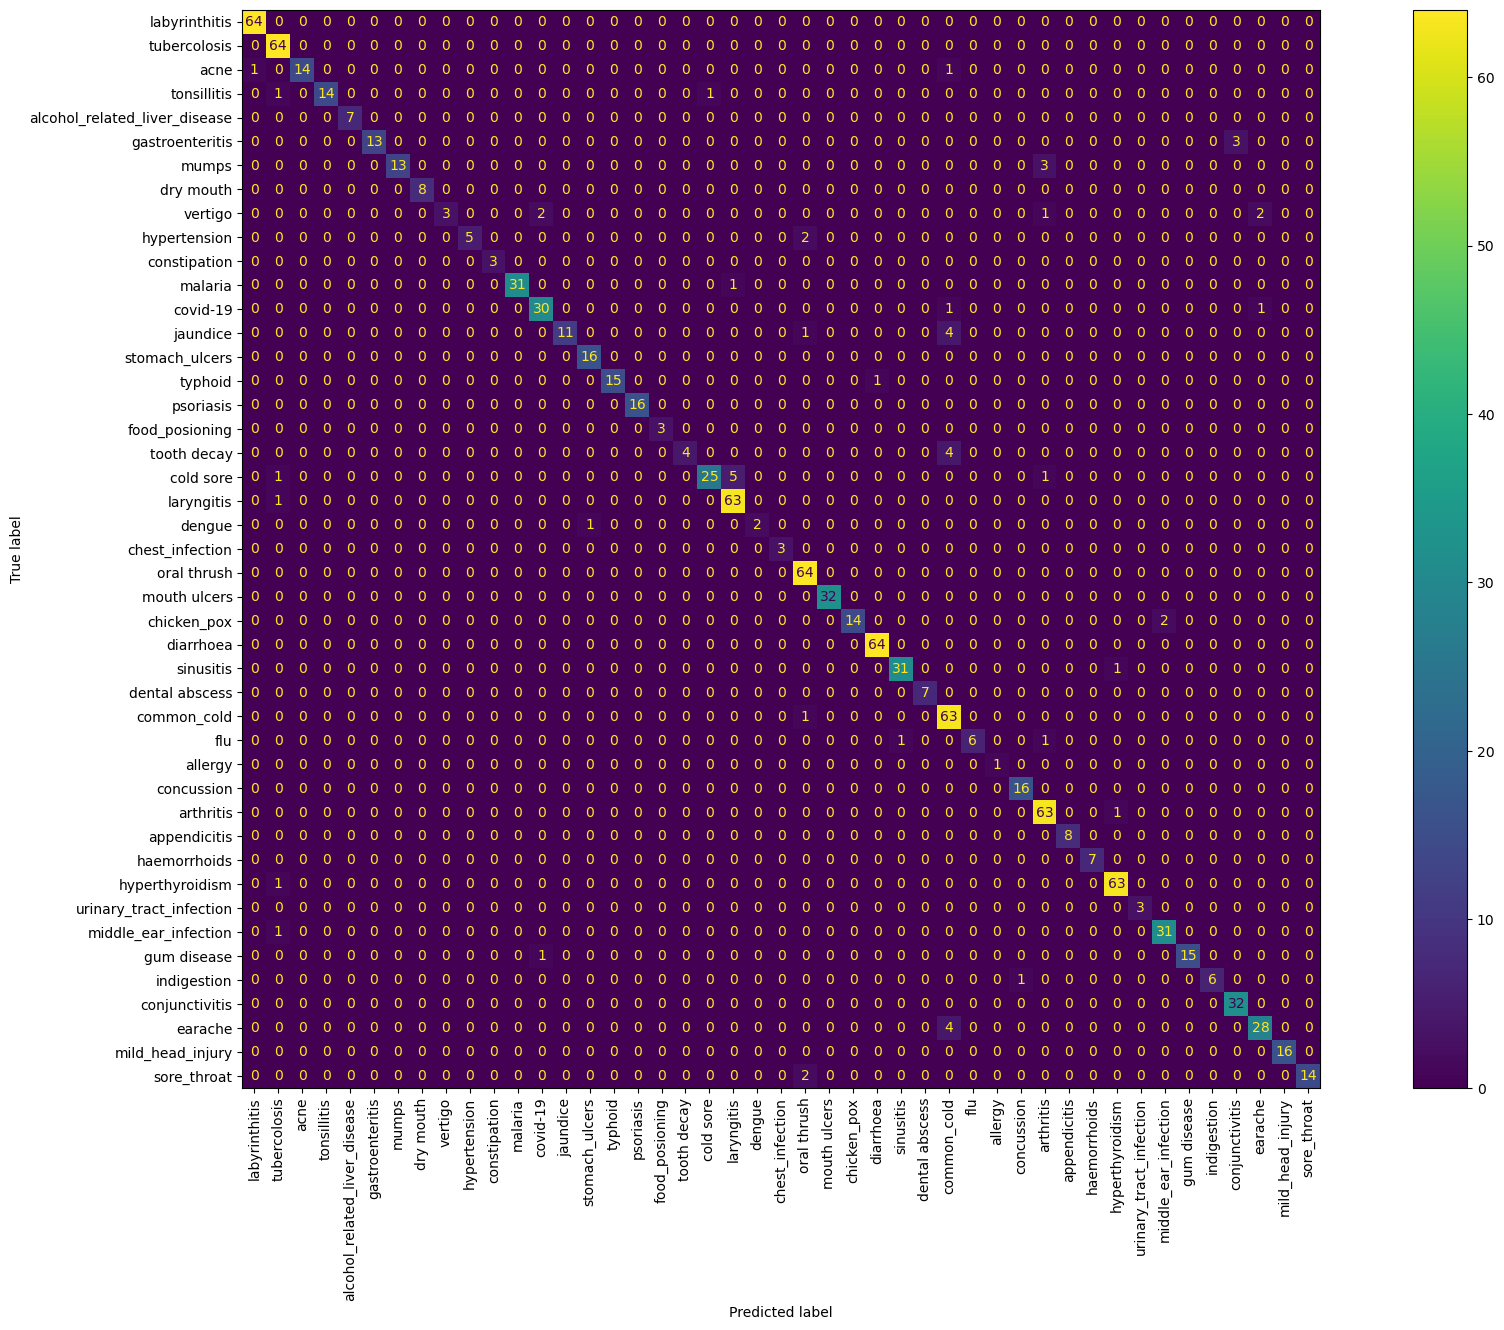

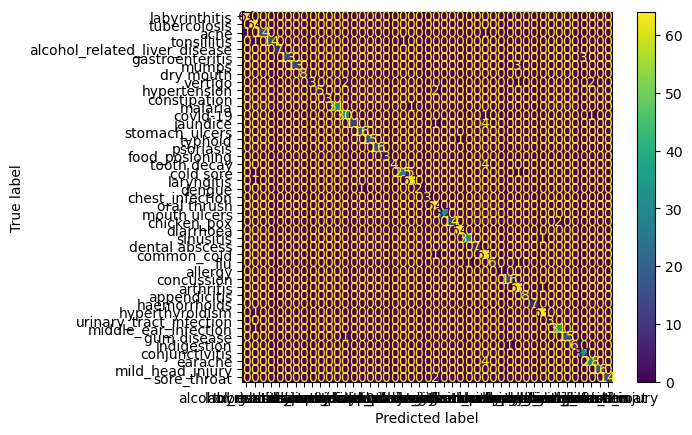

Recall score for Multinomial Naive Bayes = 0.9108465608465608


In [28]:
confusion_matrix_recall_score(y_test, y_pred, "Multinomial Naive Bayes")

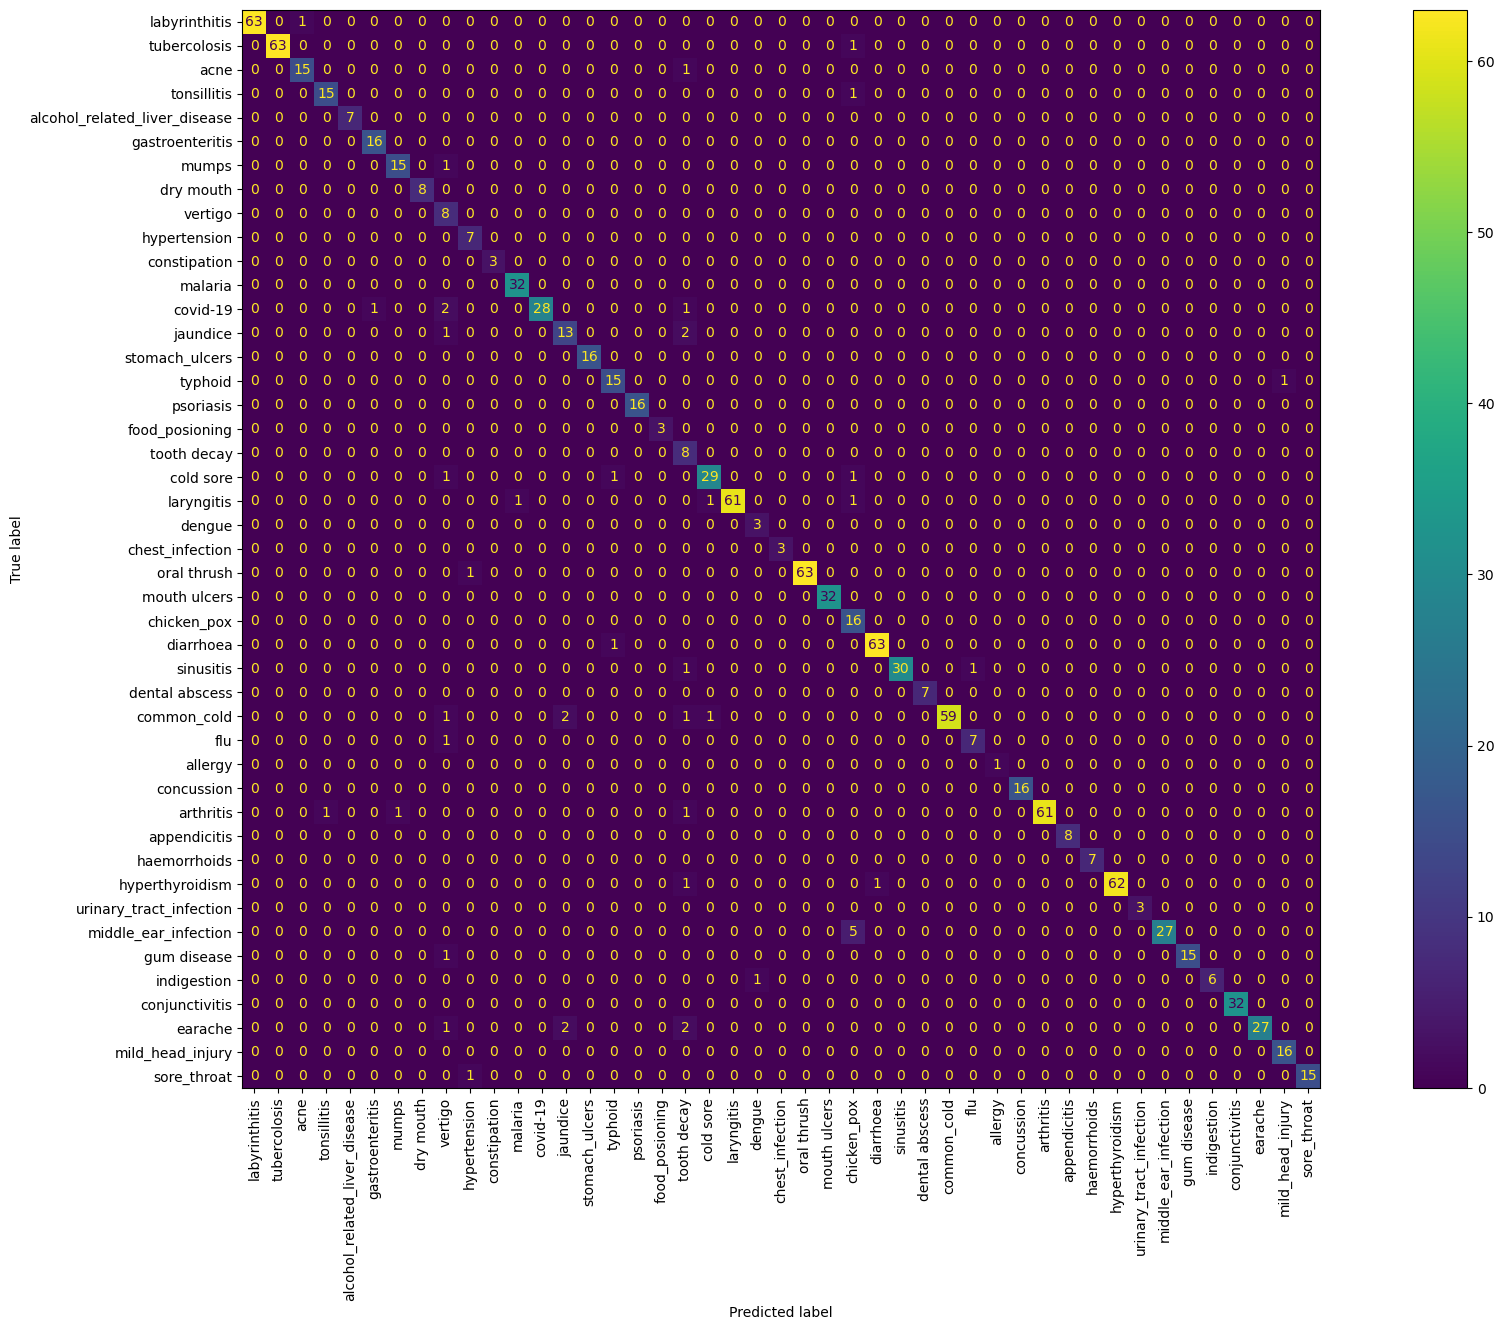

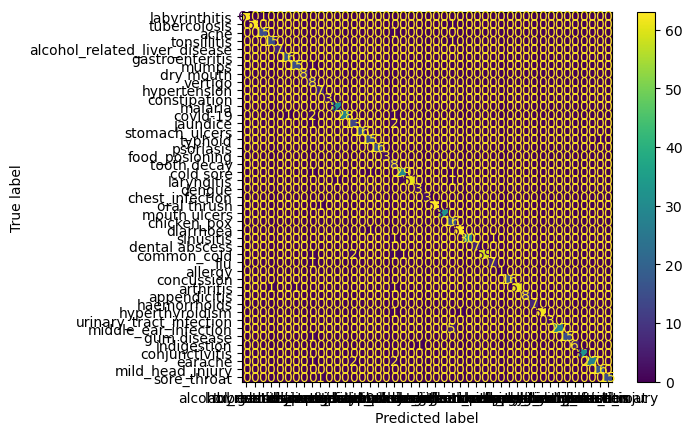

Recall score for Gaussian Naive Bayes = 0.9624503968253968


In [29]:
confusion_matrix_recall_score(y_test, y_pred_gnb, "Gaussian Naive Bayes")

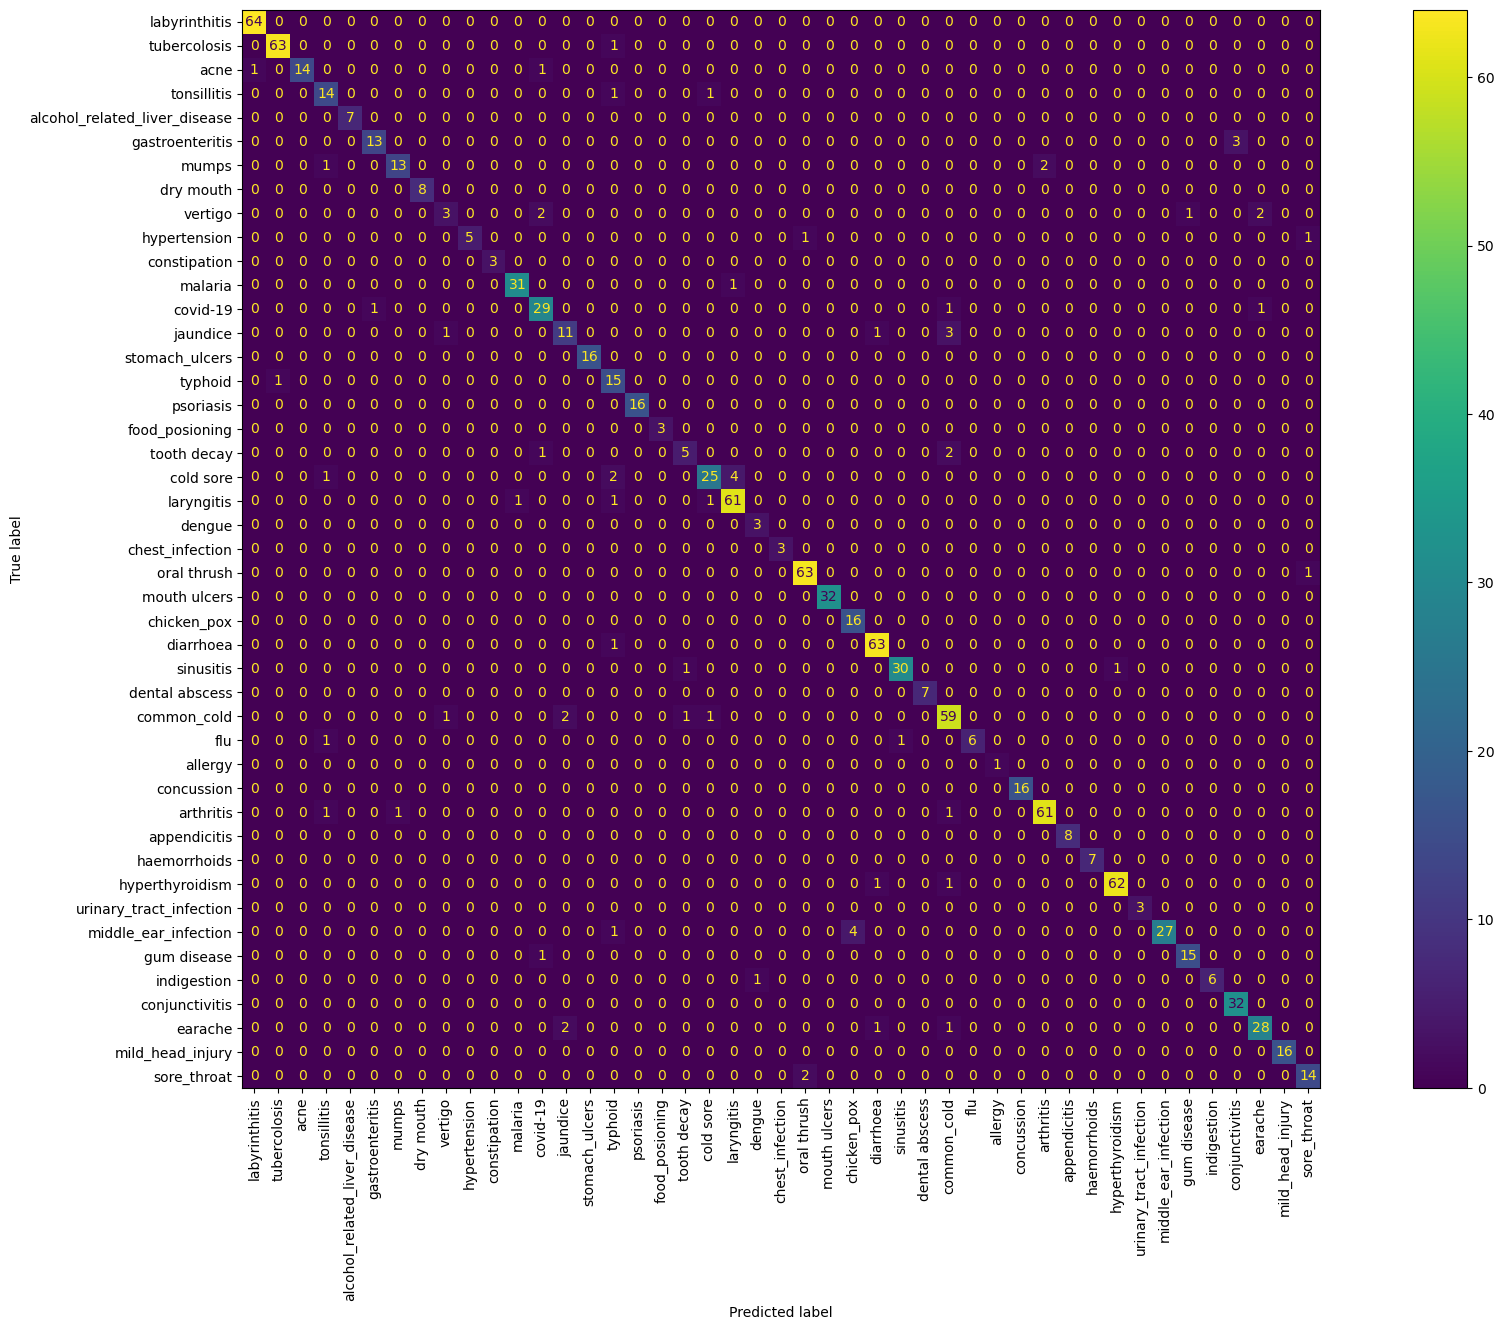

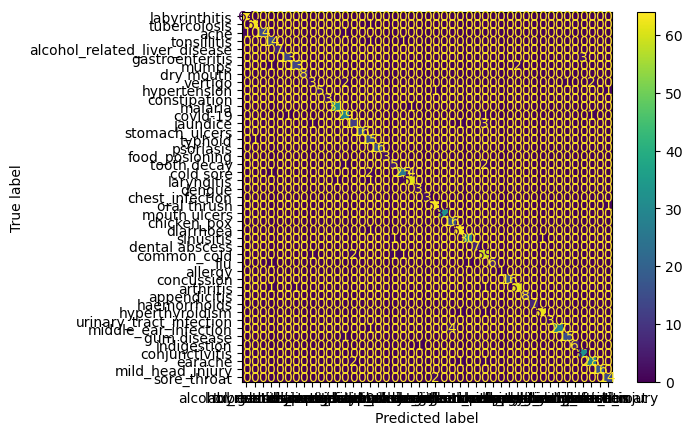

Recall score for Random Forest = 0.9154761904761904


In [30]:
confusion_matrix_recall_score(y_test, y_pred_rfc, "Random Forest")

In [31]:
X = np.array(X)
y = np.array(y)

### Stratified K fold

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

def strat_k_fold(model, X, y):
    # Initialize stratified k-fold object
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Iterate through folds
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        # Get training and test data for current fold
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Train random forest classifier on current fold
        model.fit(X_train, y_train)
        
        # Make predictions on test data
        y_pred = model.predict(X_test)
        
        # Calculate accuracy on test data
        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='macro')
        
        # Print results for current fold
        print('Fold:', fold)
        # print('Training data:', X_train, y_train)
        # print('Test data:', X_test, y_test)
        print('Accuracy:', acc)
        print('Recall Score:', recall)
    return model 


### Gaussian Naive Bayes

Fold: 0
Accuracy: 0.9473067915690867
Recall Score: 0.9553420479302832
Fold: 1
Accuracy: 0.9484777517564403
Recall Score: 0.9621344058991119
Fold: 2
Accuracy: 0.9718640093786636
Recall Score: 0.9748590581531758
Fold: 3
Accuracy: 0.9413833528722158
Recall Score: 0.9440891570303335
Fold: 4
Accuracy: 0.9601406799531067
Recall Score: 0.9686066700184349


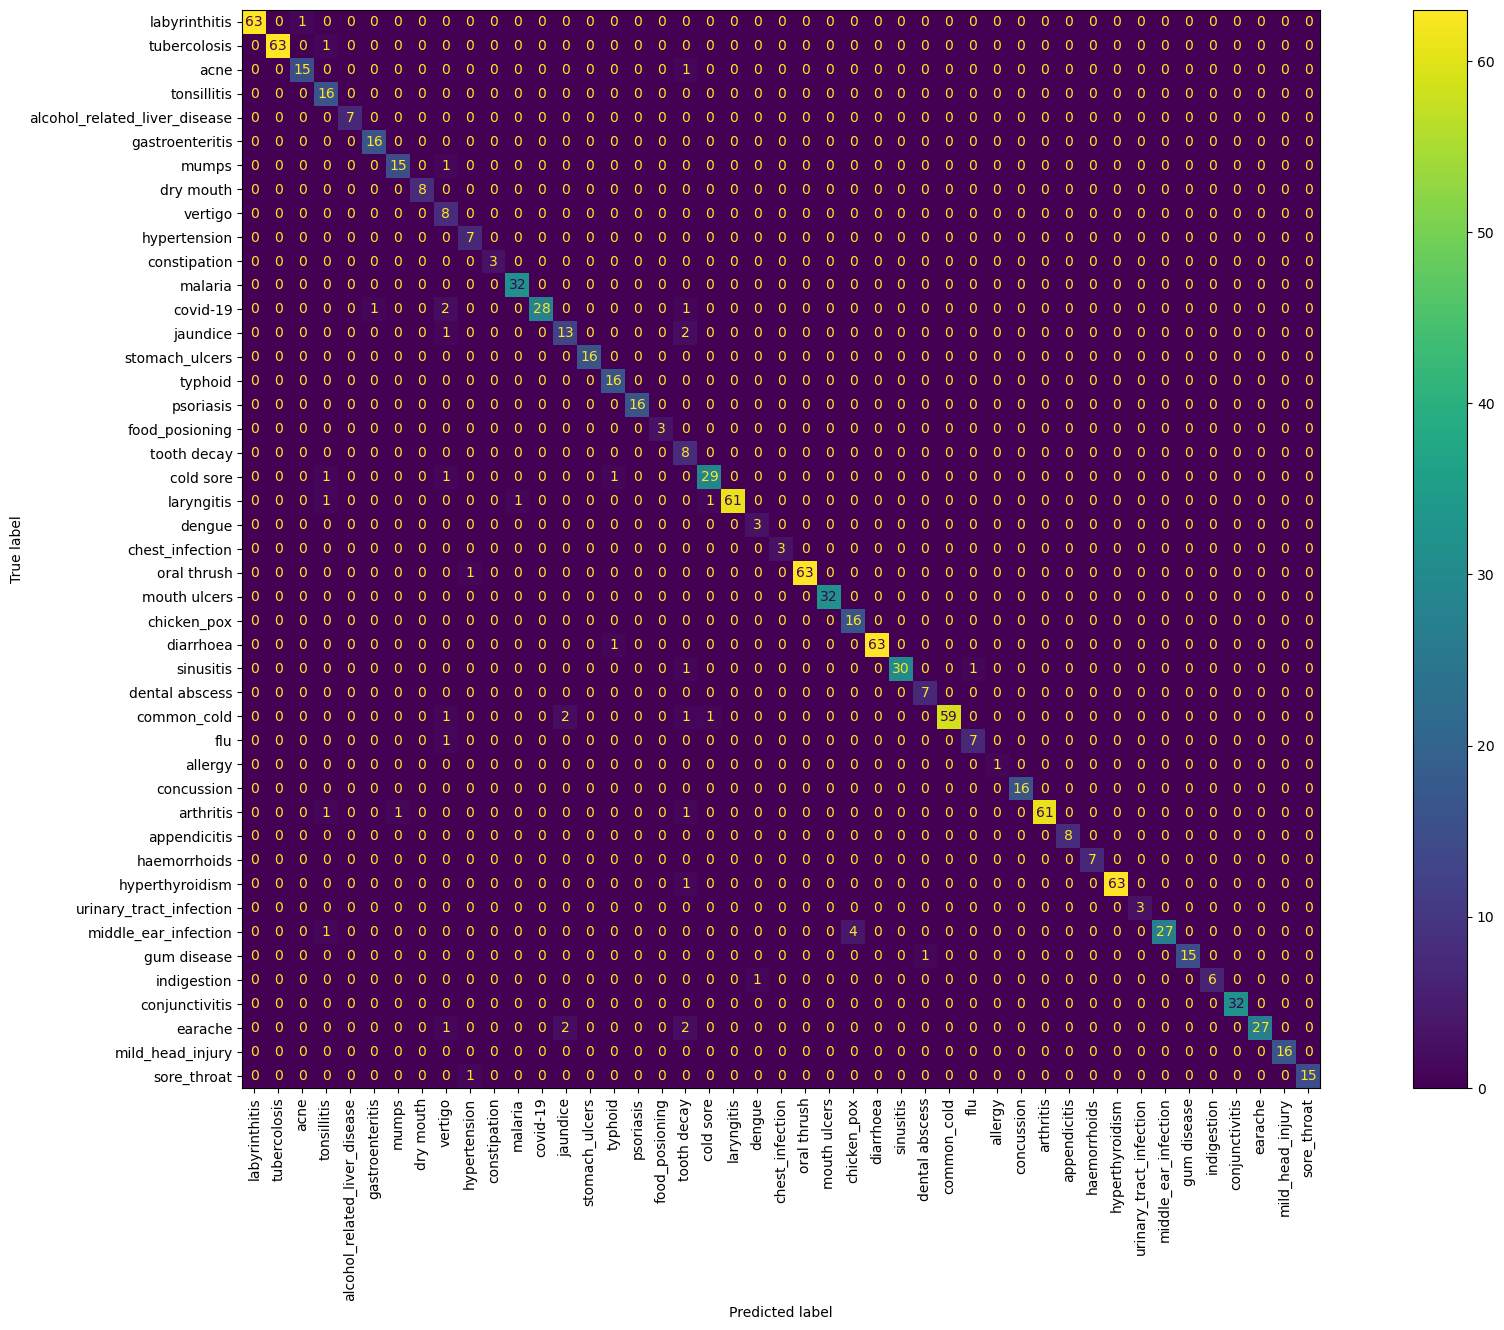

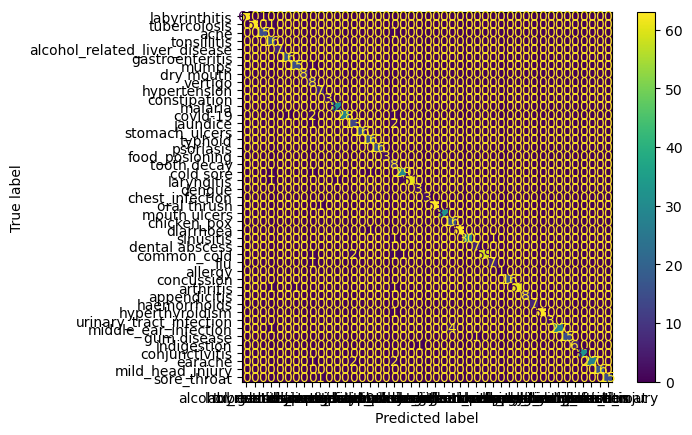

Recall score for GaussianNB() = 0.9655753968253967


In [33]:
gnb_model = strat_k_fold(GaussianNB(), X, y)
y_pred_gnb = gnb_model.predict(X_test)
confusion_matrix_recall_score(y_test, y_pred_gnb, gnb_model)

### Multinomial Naive Bayes

Fold: 0
Accuracy: 0.9531615925058547
Recall Score: 0.904393832746774
Fold: 1
Accuracy: 0.9391100702576113
Recall Score: 0.87661337355455
Fold: 2
Accuracy: 0.9636576787807737
Recall Score: 0.9151515717398071
Fold: 3
Accuracy: 0.9460726846424384
Recall Score: 0.9003512652924417
Fold: 4
Accuracy: 0.9554513481828839
Recall Score: 0.907228087816323


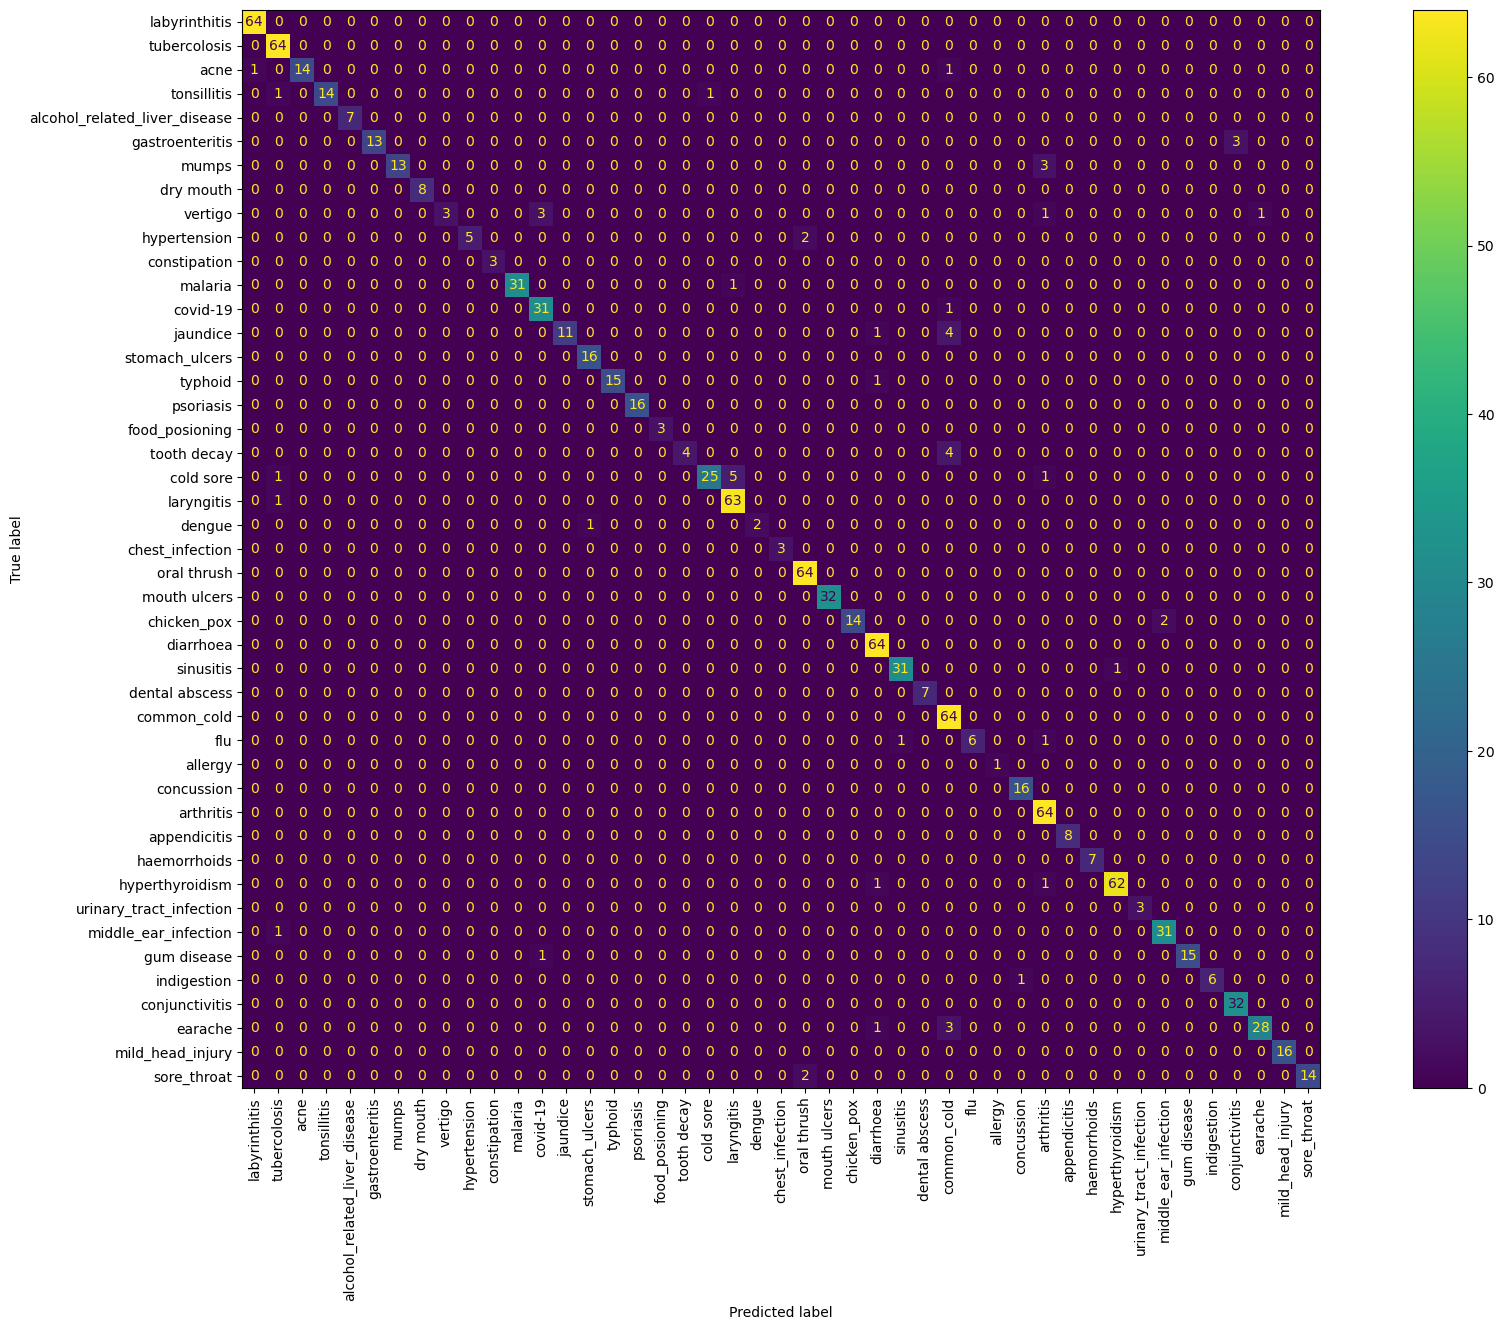

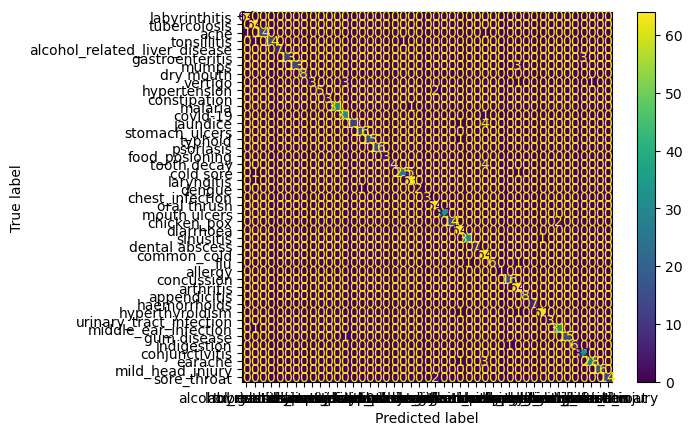

Recall score for MultinomialNB() = 0.9118882275132274


In [34]:
mnb_model = strat_k_fold(MultinomialNB(), X, y)
y_pred_mnb = mnb_model.predict(X_test)
confusion_matrix_recall_score(y_test, y_pred_mnb, mnb_model)

### Decision Tree

Fold: 0
Accuracy: 0.8875878220140515
Recall Score: 0.8174114295290766
Fold: 1
Accuracy: 0.8911007025761124
Recall Score: 0.8281747228806055
Fold: 2
Accuracy: 0.9132473622508792
Recall Score: 0.8380579377049965
Fold: 3
Accuracy: 0.8815943728018757
Recall Score: 0.8352762575115517
Fold: 4
Accuracy: 0.8991793669402111
Recall Score: 0.8581880820704352


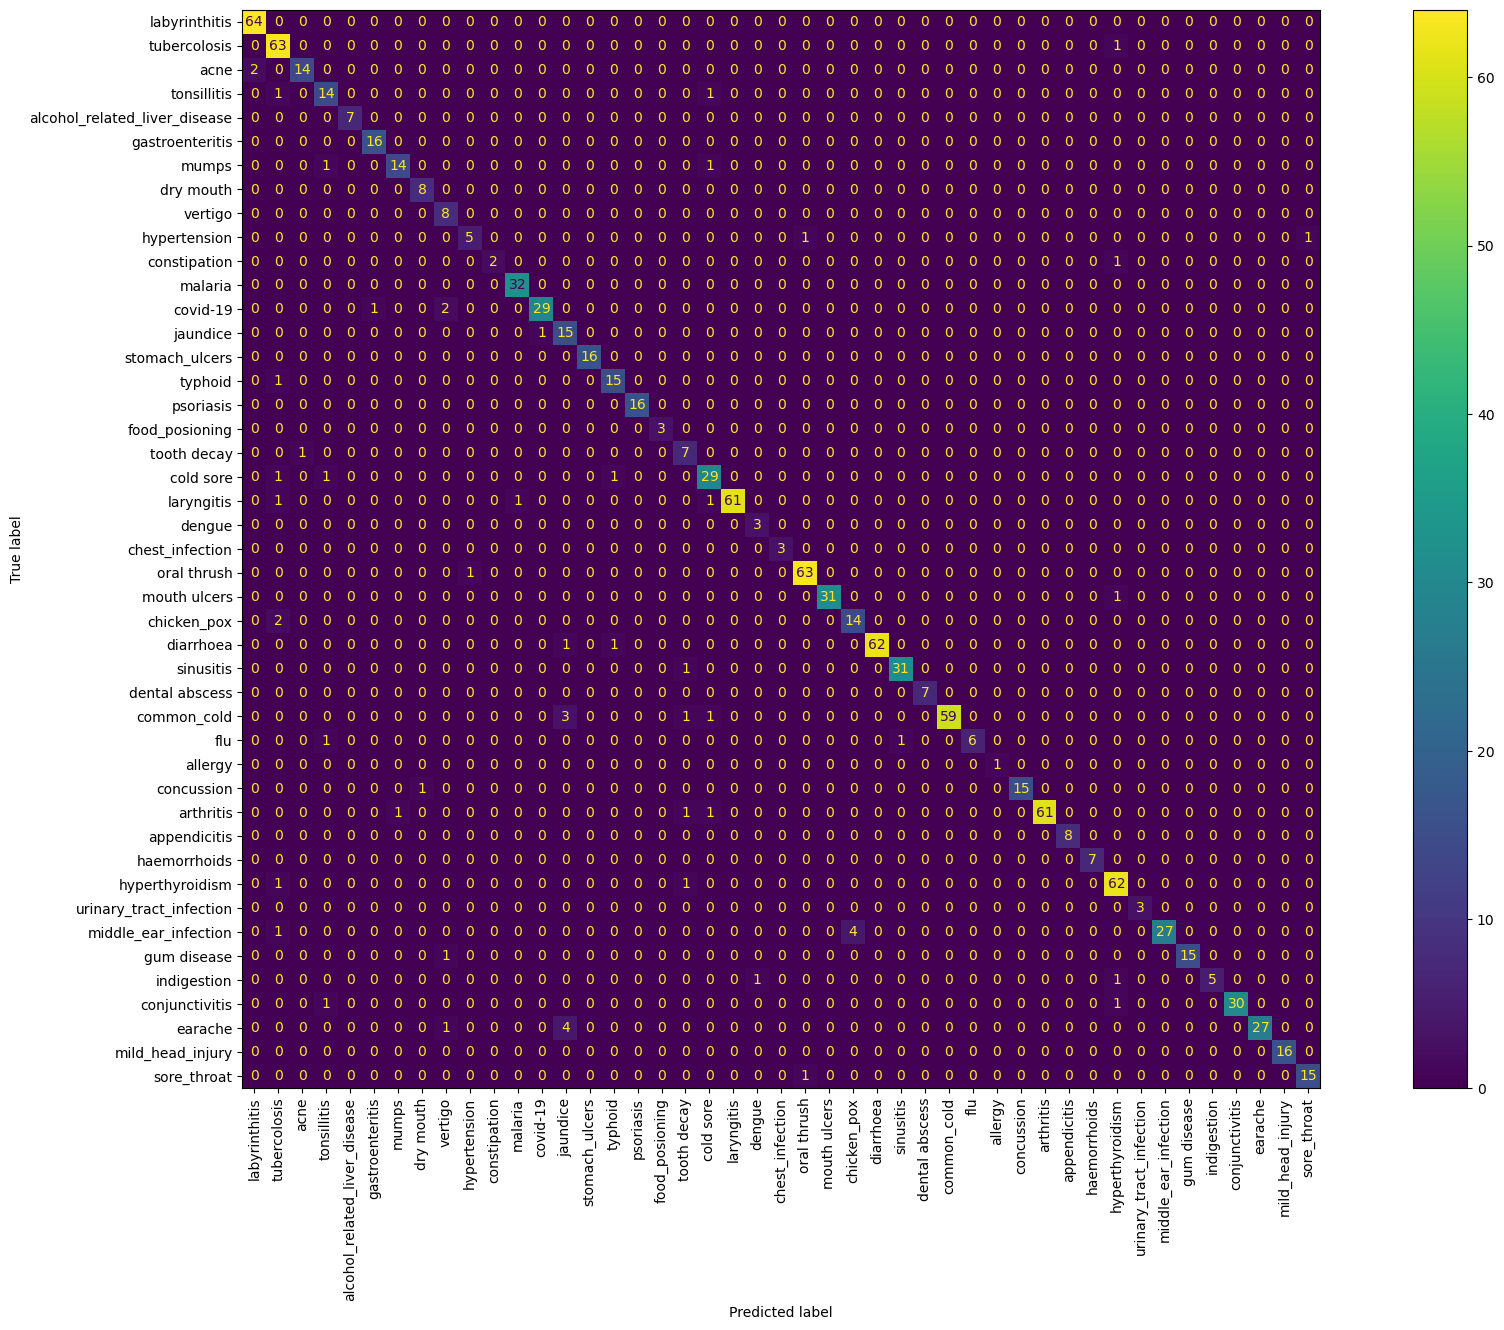

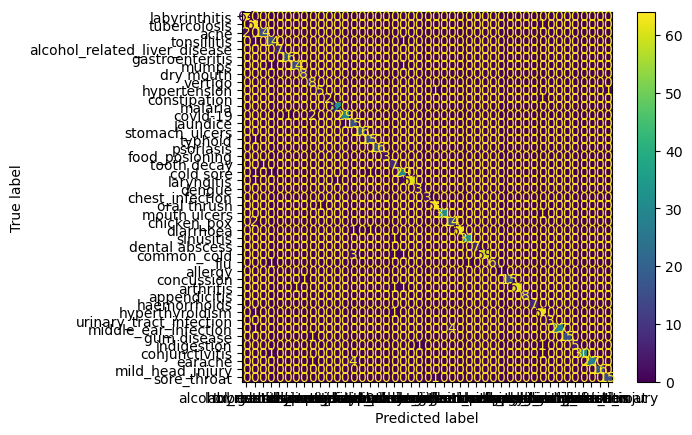

Recall score for DecisionTreeClassifier() = 0.9337136243386244


In [35]:
dtc_model = strat_k_fold(DecisionTreeClassifier(), X, y)
y_pred_dtc = dtc_model.predict(X_test)
confusion_matrix_recall_score(y_test, y_pred_dtc, dtc_model)

### Random Forest

Fold: 0
Accuracy: 0.9250585480093677
Recall Score: 0.9002537288419643
Fold: 1
Accuracy: 0.9203747072599532
Recall Score: 0.8948796954679308
Fold: 2
Accuracy: 0.9519343493552169
Recall Score: 0.9293861955038426
Fold: 3
Accuracy: 0.9202813599062134
Recall Score: 0.8910145801910507
Fold: 4
Accuracy: 0.9390386869871044
Recall Score: 0.9227859896095192


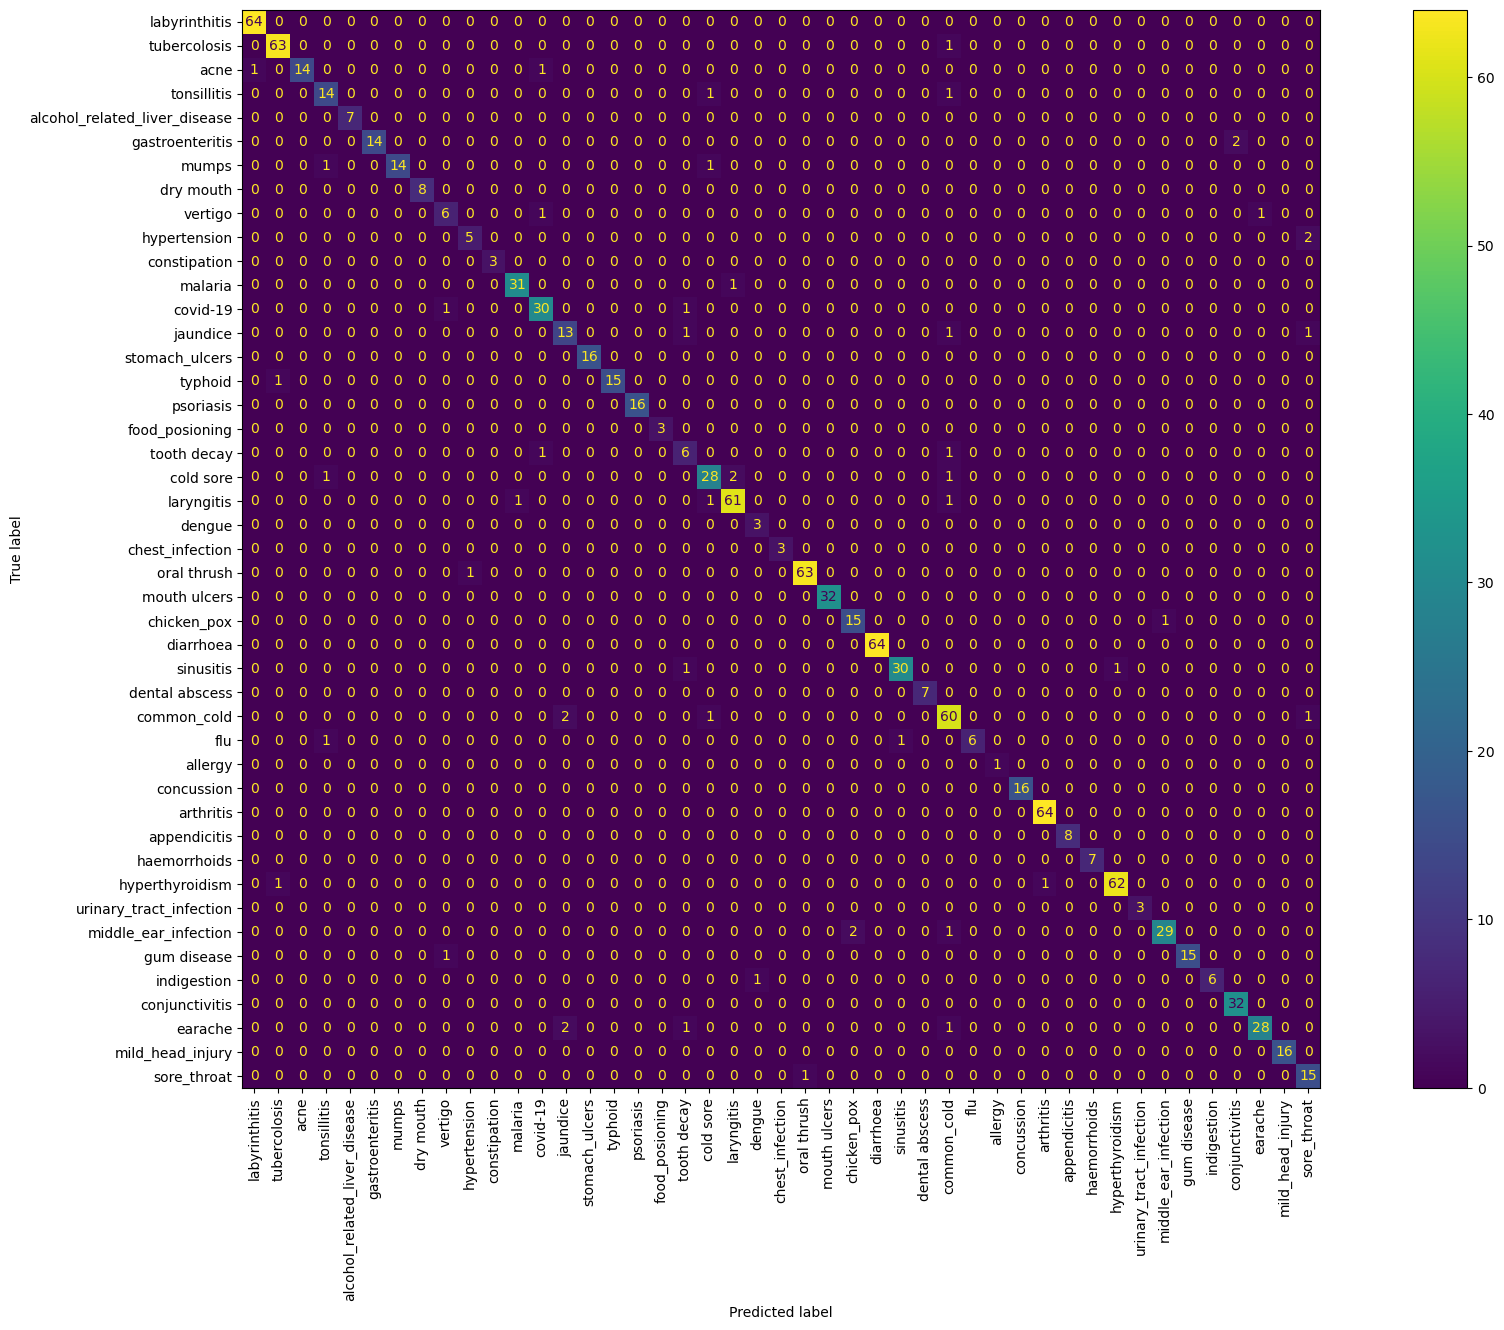

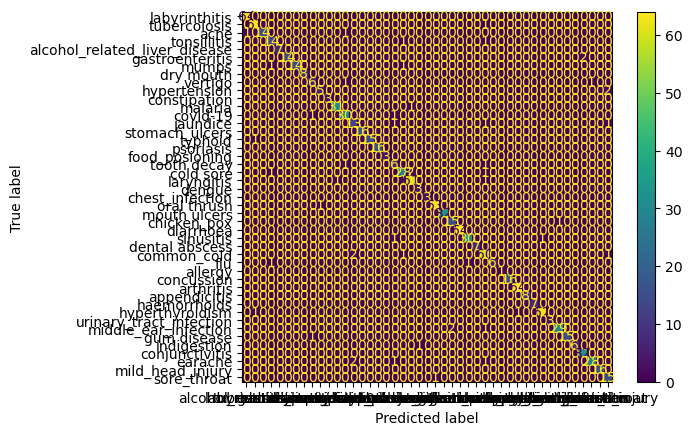

Recall score for RandomForestClassifier() = 0.9380456349206349


In [36]:
rfc_model = strat_k_fold(RandomForestClassifier(), X, y)
y_pred_rfc = rfc_model.predict(X_test)
confusion_matrix_recall_score(y_test, y_pred_rfc, rfc_model)

Fold: 0
Accuracy: 0.9250585480093677
Recall Score: 0.89980056980057
Fold: 1
Accuracy: 0.9531615925058547
Recall Score: 0.9364609159903279
Fold: 2
Accuracy: 0.9730363423212193
Recall Score: 0.9695478464890229
Fold: 3
Accuracy: 0.958968347010551
Recall Score: 0.9430360315066195
Fold: 4
Accuracy: 0.9613130128956624
Recall Score: 0.9457308530249705


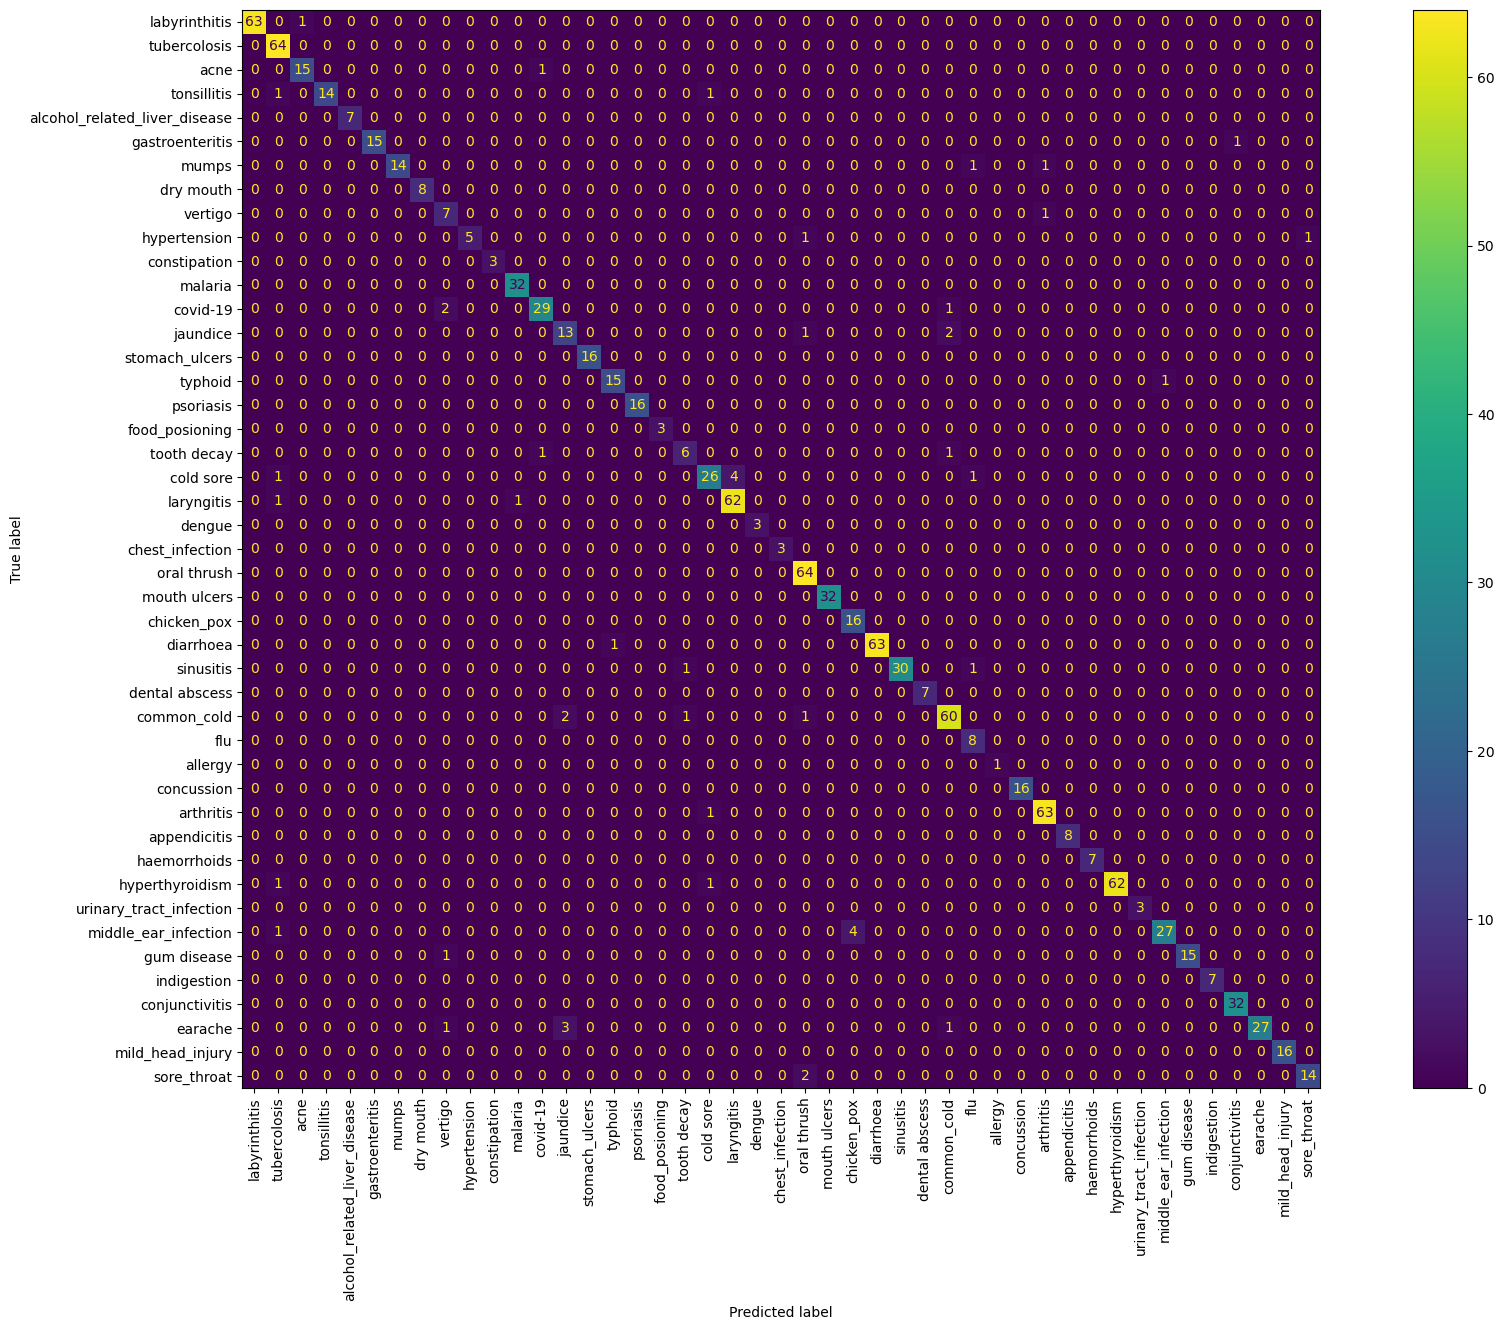

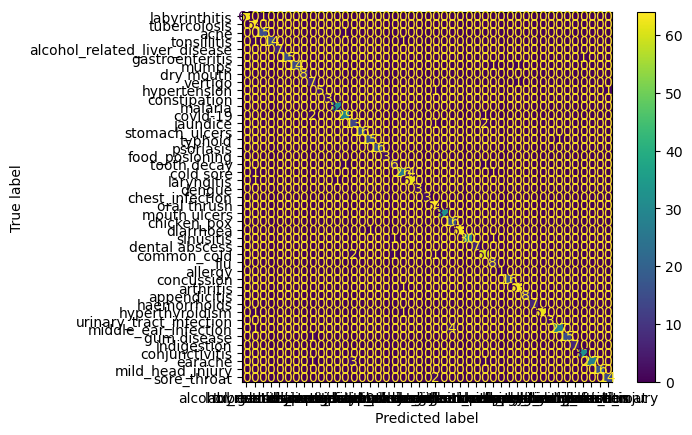

Recall score for RandomForestClassifier(max_depth=100, warm_start=True) = 0.948859126984127


In [37]:
# Best parameters:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 100, 'max_features': 'auto', 'n_estimators': 100, 'warm_start': True}

hyper_rfc = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=100, max_features='auto', n_estimators=100, warm_start=True)
rfc_model_new = strat_k_fold(hyper_rfc, X, y)
y_pred_rfc = rfc_model_new.predict(X_test)
confusion_matrix_recall_score(y_test, y_pred_rfc, rfc_model_new)

In [38]:
rfc_model.min_samples_split

2

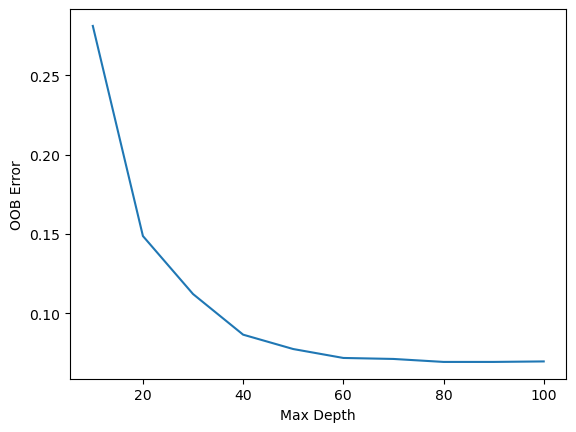

In [39]:
# Create a Random Forest Classifier with a range of n_estimators
max_depth = range(10, 110, 10)
oob_errors = []
for est in max_depth:
    rf = RandomForestClassifier(max_depth=est, oob_score=True, random_state=42)
    rf.fit(X_train, y_train)
    oob_errors.append(1 - rf.oob_score_)

# Plot the OOB error as a function of n_estimators
import matplotlib.pyplot as plt
plt.plot(max_depth, oob_errors)
plt.xlabel('Max Depth')
plt.ylabel('OOB Error')
plt.show()


In [40]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'n_estimators': [60, 90, 100],
#                         'criterion': ["gini", "entropy", "log_loss"],
#                         'max_features': ['sqrt', 'log2', None, 'auto'],
#                         'bootstrap': [True, False],
#                         'warm_start': [True, False],
#                         'max_depth': [50, 70, 90, 100]}

# new_rfc = RandomForestClassifier()
# grid_search = GridSearchCV(estimator=new_rfc, param_grid=param_grid, cv=5, n_jobs=-1)

# grid_search.fit(X_train, y_train)

# # Print the best parameters and score
# print("Best parameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

### KNN

Fold: 0
Accuracy: 0.9355971896955504
Recall Score: 0.9052904307021955
Fold: 1
Accuracy: 0.9391100702576113
Recall Score: 0.9121236323589266
Fold: 2
Accuracy: 0.9601406799531067
Recall Score: 0.9415221336397808
Fold: 3
Accuracy: 0.9320046893317703
Recall Score: 0.9080512820512822
Fold: 4
Accuracy: 0.9460726846424384
Recall Score: 0.925309535780124


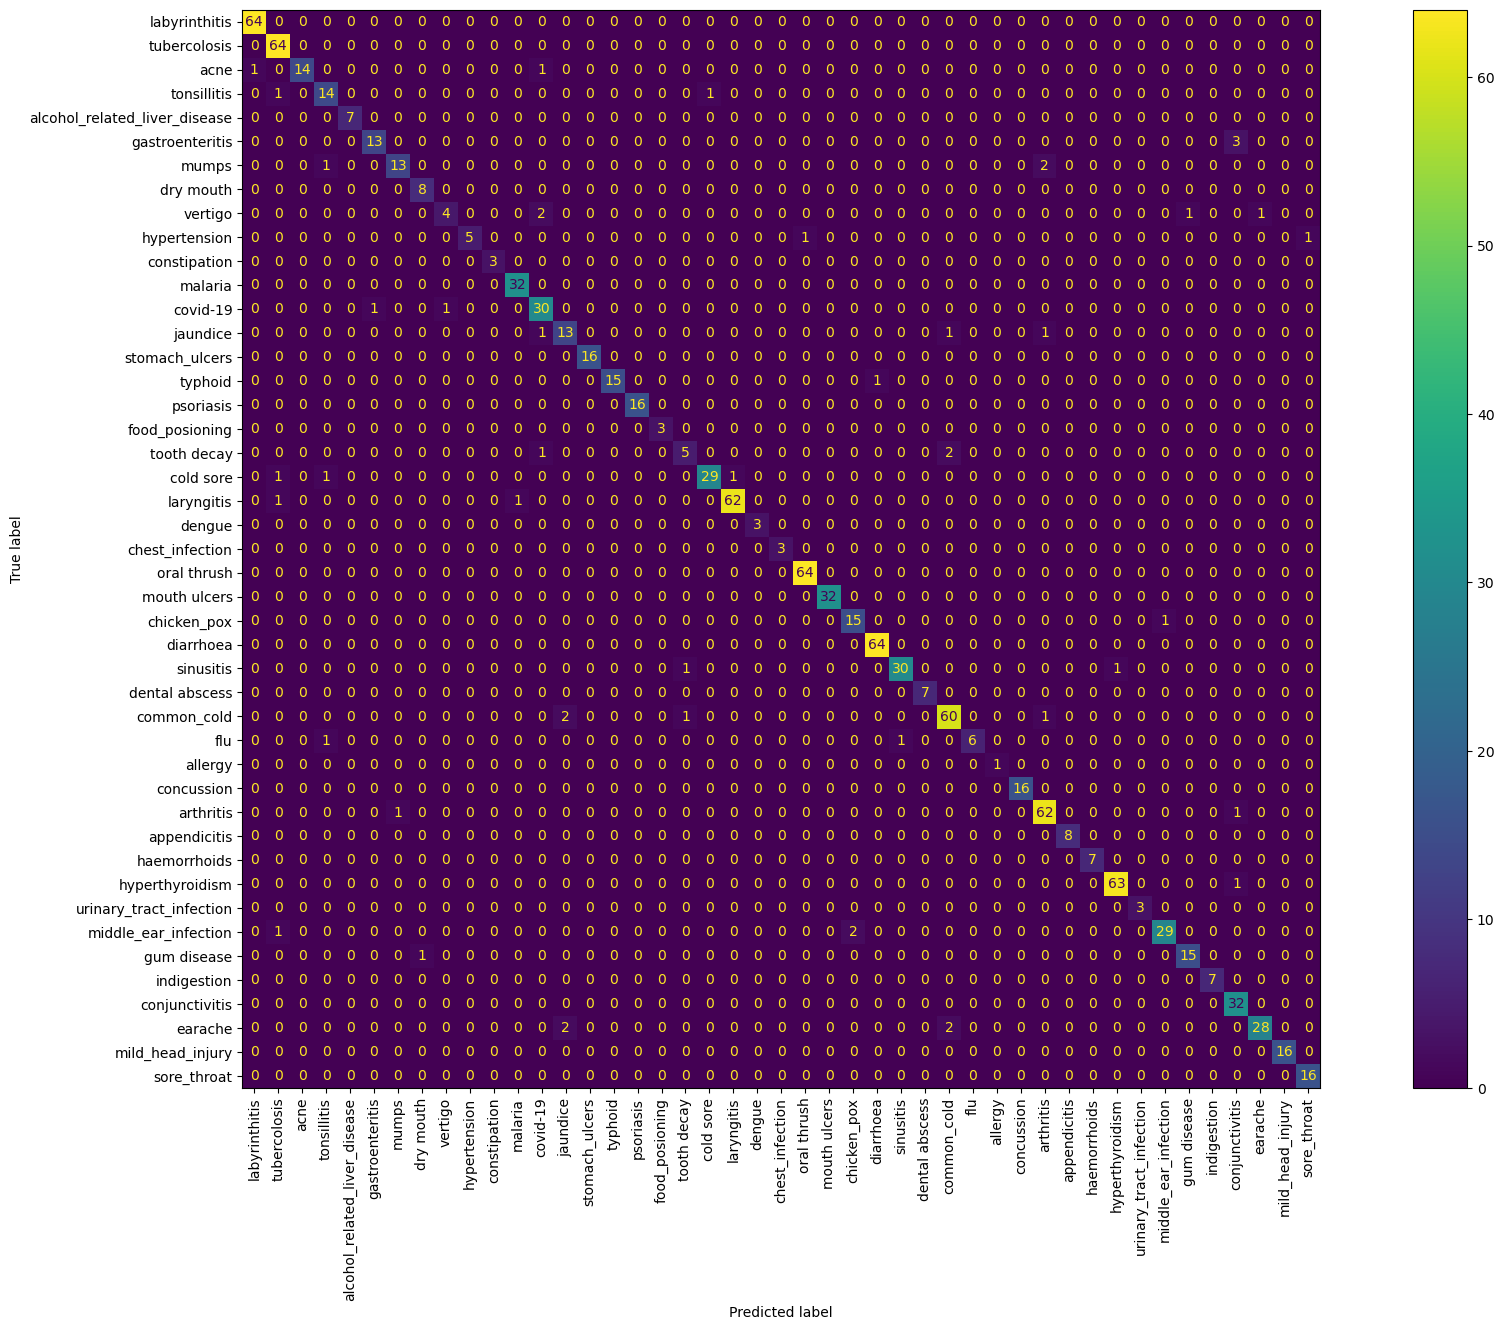

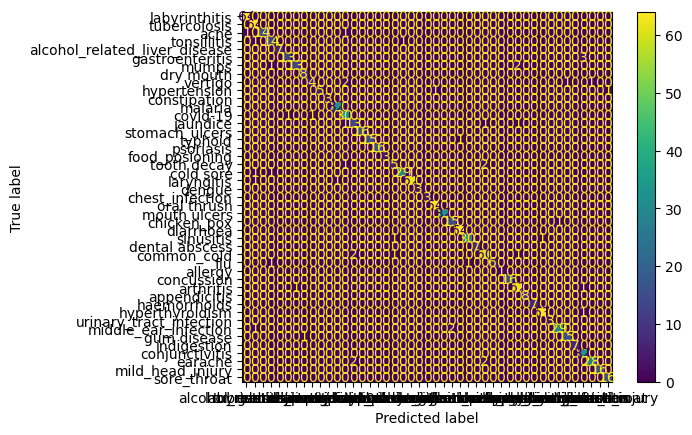

Recall score for KNeighborsClassifier(n_neighbors=8) = 0.9335813492063493


In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = strat_k_fold(KNeighborsClassifier(n_neighbors=8), X, y)
y_pred_knn = knn.predict(X_test)
confusion_matrix_recall_score(y_test, y_pred_knn, knn)

### Weighted KNN

Fold: 0
Accuracy: 0.9238875878220141
Recall Score: 0.8891426177308531
Fold: 1
Accuracy: 0.9192037470725996
Recall Score: 0.8846232852115208
Fold: 2
Accuracy: 0.9495896834701055
Recall Score: 0.9230369891546363
Fold: 3
Accuracy: 0.9202813599062134
Recall Score: 0.8942825540472598
Fold: 4
Accuracy: 0.94021101992966
Recall Score: 0.9198287246522542


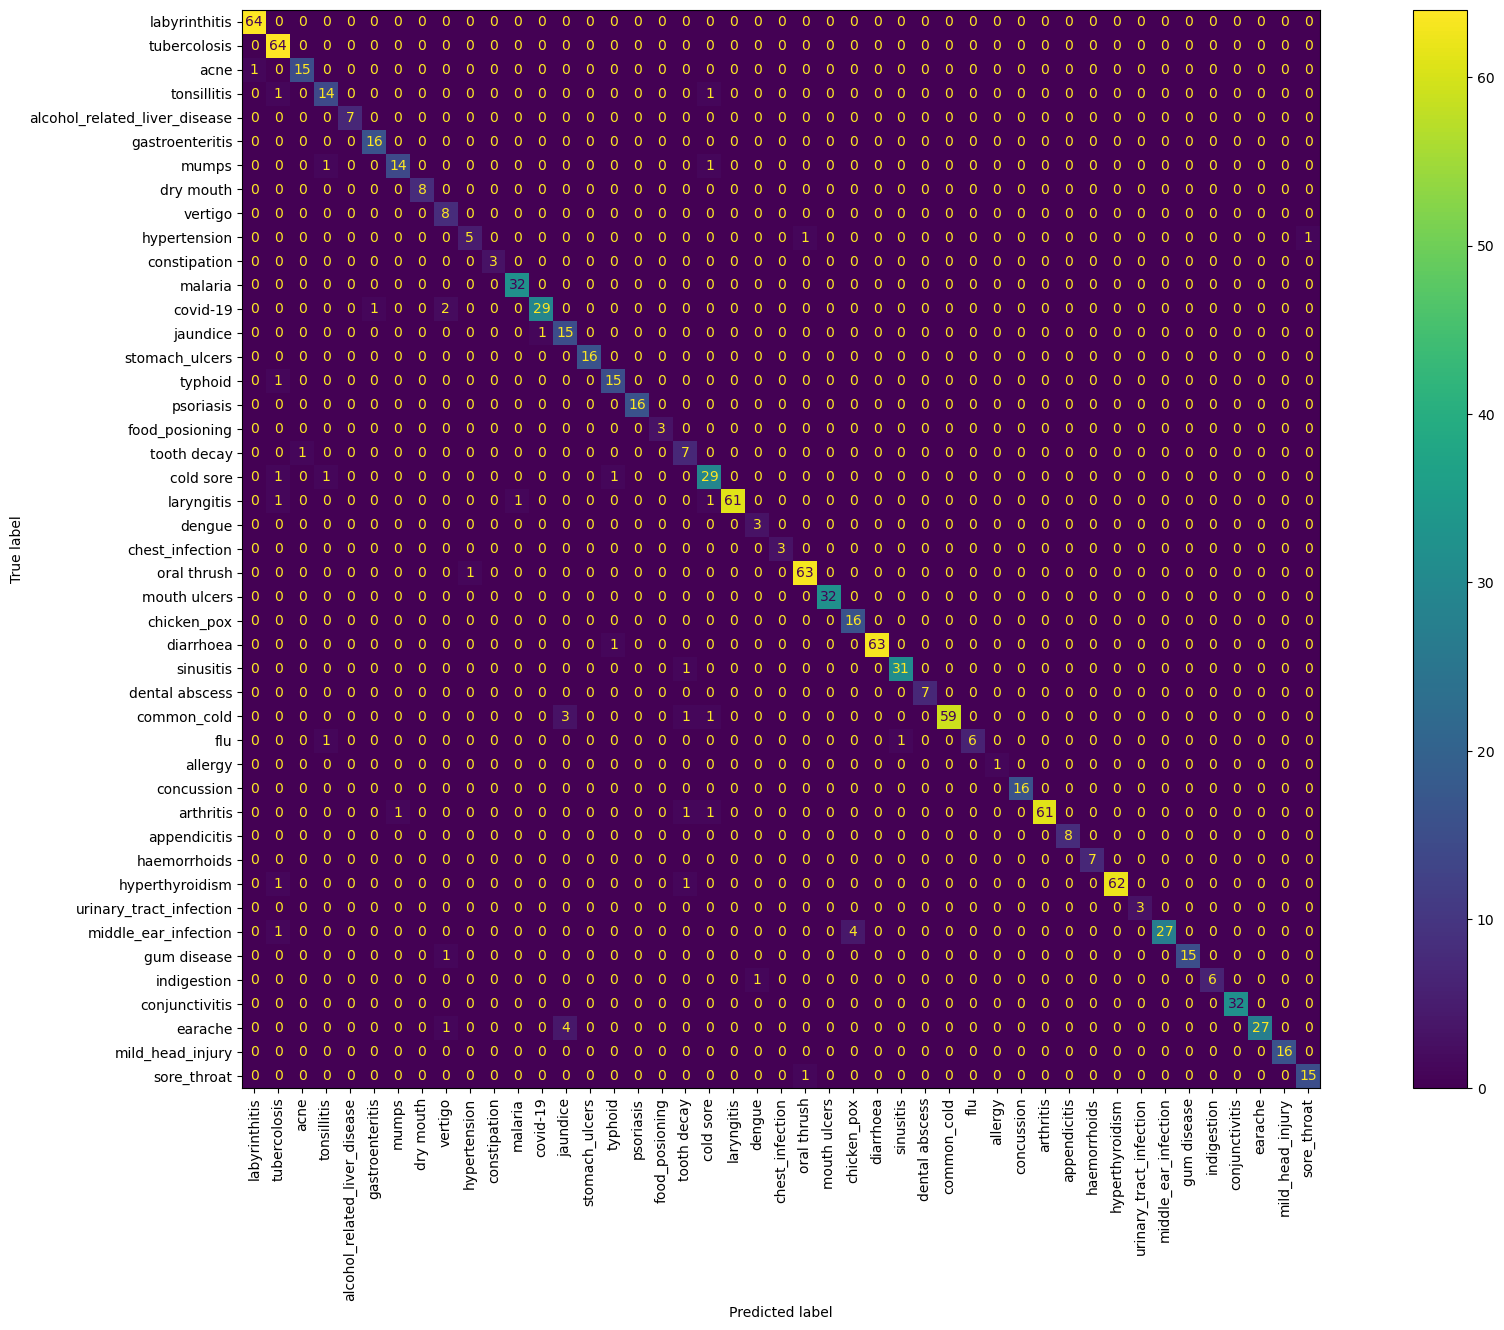

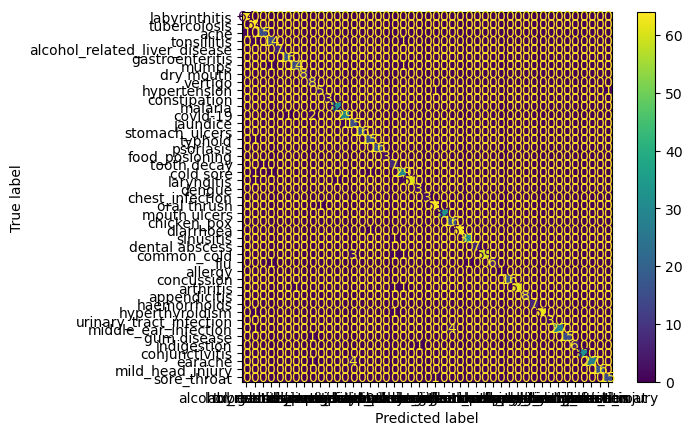

Recall score for KNeighborsClassifier(n_neighbors=10, weights='distance') = 0.9526289682539683


In [42]:
wt_knn = strat_k_fold(KNeighborsClassifier(n_neighbors=10, weights='distance'), X, y)
y_pred_wtknn = wt_knn.predict(X_test)
confusion_matrix_recall_score(y_test, y_pred_wtknn, wt_knn)

In [43]:
# create list of possible values for n_neighbors
from sklearn.model_selection import cross_val_score
k_values = list(range(1, 51))

# empty list to store cross-validation scores
cv_scores = []

# perform 10-fold cross-validation for each value of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# find optimal k
optimal_k = k_values[cv_scores.index(max(cv_scores))]

# print optimal k and its corresponding accuracy
print("Optimal value of n_neighbors is:", optimal_k)
print("Accuracy:", max(cv_scores))

Optimal value of n_neighbors is: 10
Accuracy: 0.9287572429110181


### Gradient Boosting Classifier

In [44]:
# from sklearn.ensemble import GradientBoostingClassifier
# gbm = strat_k_fold(GradientBoostingClassifier(), X, y)
# y_pred_gbm = gbm.predict(X_test)
# confusion_matrix_recall_score(y_test, y_pred_gbm, gbm)

### Support Vector Classifier

Fold: 0
Accuracy: 0.9461358313817331
Recall Score: 0.9075458354281882
Fold: 1
Accuracy: 0.9332552693208431
Recall Score: 0.8944776269482152
Fold: 2
Accuracy: 0.9577960140679953
Recall Score: 0.9120666044195457
Fold: 3
Accuracy: 0.9320046893317703
Recall Score: 0.8962440087145969
Fold: 4
Accuracy: 0.9519343493552169
Recall Score: 0.9177016926428692


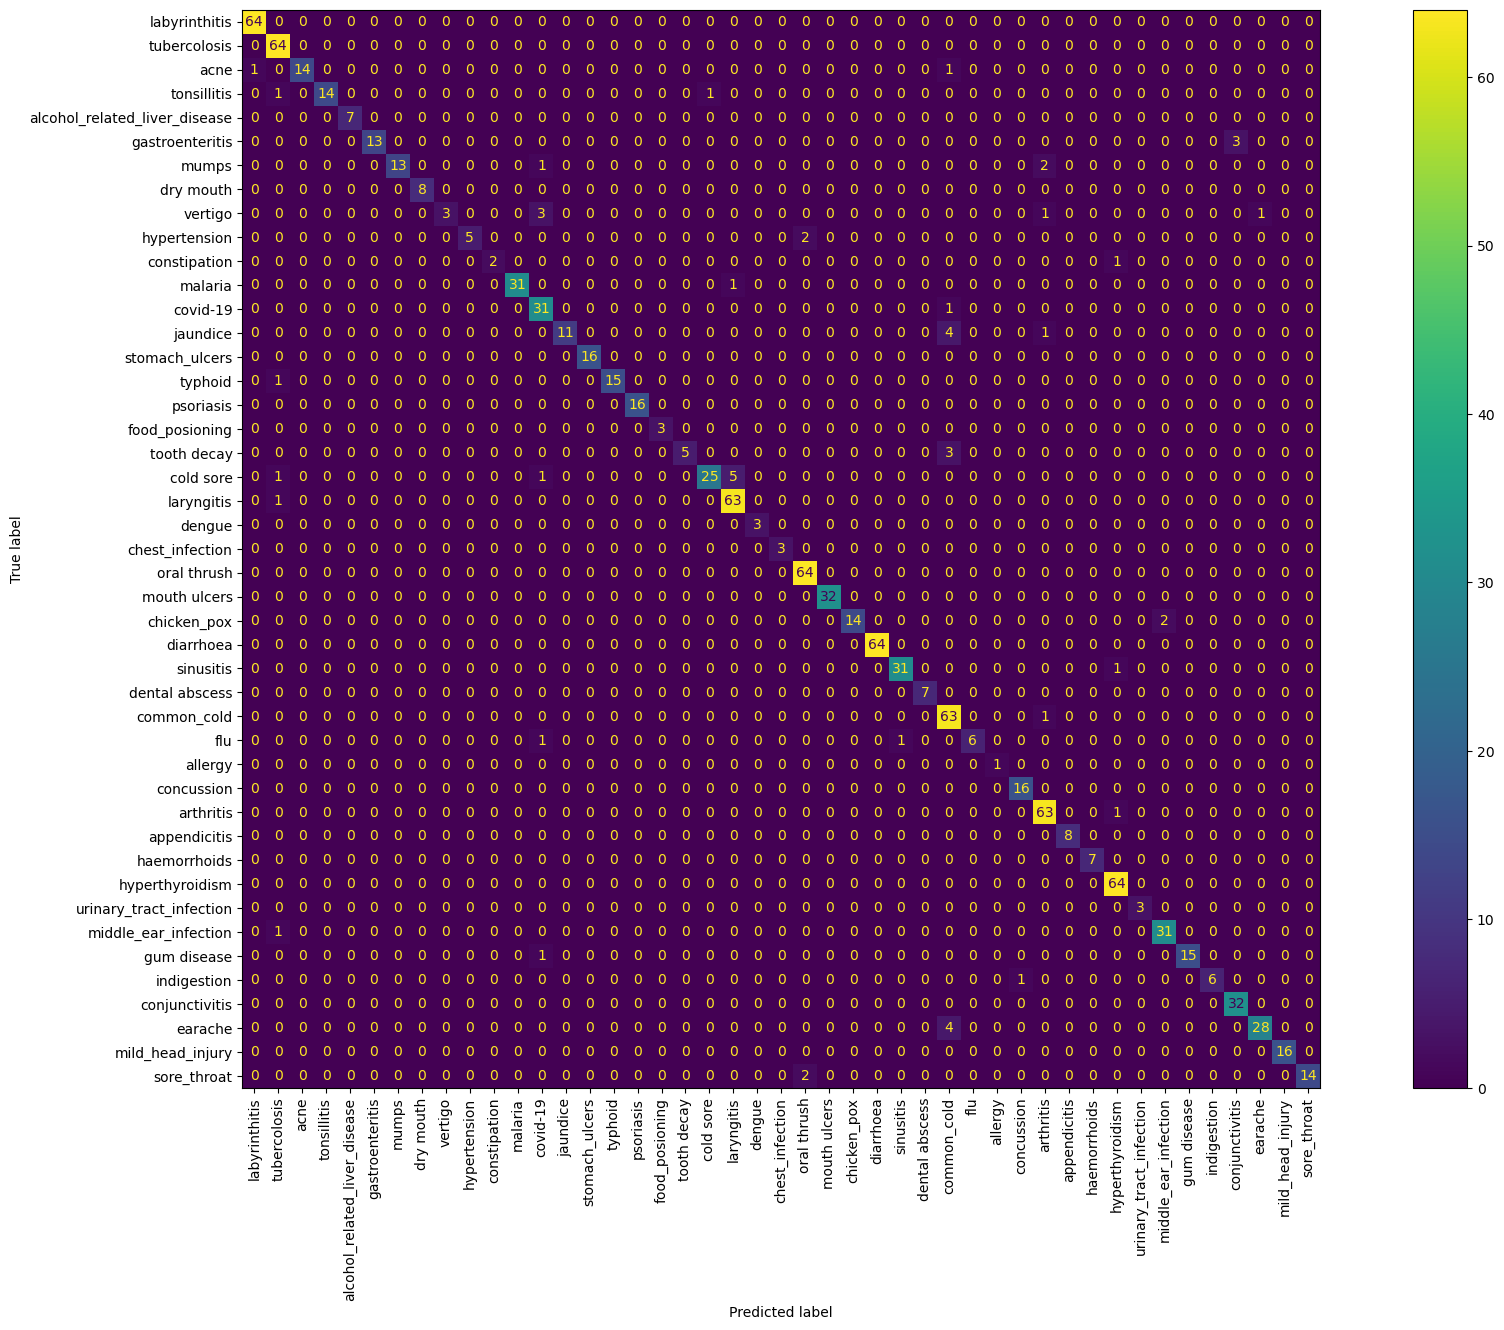

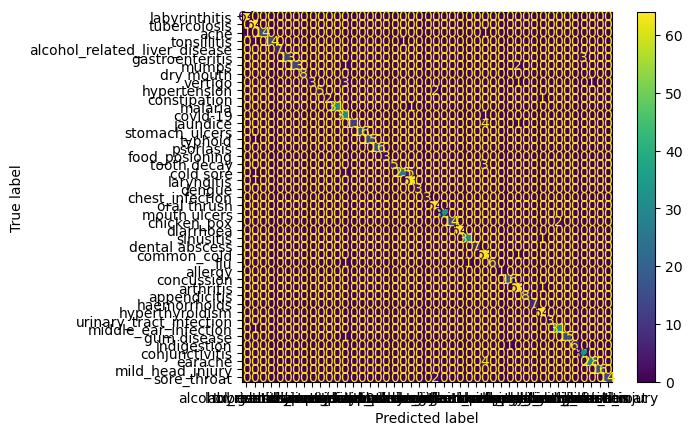

Recall score for SVC() = 0.9146660052910052


In [45]:
from sklearn.svm import SVC
svc_model = strat_k_fold(SVC(kernel='rbf'), X, y)
y_pred_svc = svc_model.predict(X_test)
confusion_matrix_recall_score(y_test, y_pred_svc, svc_model)

In [46]:
symptoms = list(df.columns[1:])

In [47]:
len(symptoms)

171

In [48]:
new_data =['stomach_ache', 'nausea', 'loose_motion']
new_data1=['headache', 'body_ache', 'cough', 'fever', 'loose_motion']
newer_data = ['headache', 'cough' ,'sore_throat', 'extreme_weakness']
input_list = []
for i in symptoms:
    if i in newer_data:
        input_list.append(1)
    else:
        input_list.append(0)
input_list = np.array(input_list)
len(input_list)

171

In [49]:
classes = mnb_model.classes_

In [50]:
len(classes)

45

In [51]:
pred_gnb = gnb_model.predict([input_list])
pred_mnb = mnb_model.predict([input_list])
pred_rfc = rfc_model.predict([input_list])
pred_rfc_new = rfc_model_new.predict([input_list])

In [52]:
pred_gnb, pred_mnb, pred_rfc, pred_rfc_new

(array(['common_cold'], dtype='<U29'),
 array(['covid-19'], dtype='<U29'),
 array(['typhoid'], dtype=object),
 array(['covid-19'], dtype=object))

In [53]:
gnb_model_prob = gnb_model.predict_proba([input_list])

In [54]:
def top_five(classes, model, input_list):
    mapping = {}
    pred_prob = model.predict_proba([input_list])

    for disease, prob in zip(classes, pred_prob[0]):
        mapping[disease] = prob

    result = dict(sorted(mapping.items(), key=lambda x: x[1], reverse=True))

    # Get the keys of the dictionary as a list and slice the list
    sliced_keys = list(result.keys())[:5]

    # Create a new dictionary with the sliced keys
    sliced_dict = {k: result[k] for k in sliced_keys}

    # Print the sliced dictionary
    print("Model: ",  model)
    print(sliced_dict)
    return sliced_dict

### Testing

In [55]:
top_five(classes, rfc_model, input_list)

Model:  RandomForestClassifier()
{'typhoid': 0.39766666666666667, 'covid-19': 0.364, 'common_cold': 0.1643333333333333, 'tonsillitis': 0.035, 'malaria': 0.026666666666666665}


{'typhoid': 0.39766666666666667,
 'covid-19': 0.364,
 'common_cold': 0.1643333333333333,
 'tonsillitis': 0.035,
 'malaria': 0.026666666666666665}

In [56]:
rfc_new_model_dict = top_five(classes, rfc_model_new, input_list)

Model:  RandomForestClassifier(max_depth=100, warm_start=True)
{'covid-19': 0.4604040404040404, 'typhoid': 0.28010101010101013, 'common_cold': 0.2254040404040404, 'malaria': 0.015707070707070708, 'tonsillitis': 0.005404040404040404}


In [57]:
wt_knnl_dict = top_five(classes, wt_knn, input_list)

Model:  KNeighborsClassifier(n_neighbors=10, weights='distance')
{'covid-19': 0.3153009687409354, 'typhoid': 0.3153009687409354, 'common_cold': 0.2770485468885969, 'dengue': 0.09234951562953232, 'acne': 0.0}


In [58]:
top_five(classes, dtc_model, input_list)

Model:  DecisionTreeClassifier()
{'covid-19': 1.0, 'acne': 0.0, 'alcohol_related_liver_disease': 0.0, 'allergy': 0.0, 'appendicitis': 0.0}


{'covid-19': 1.0,
 'acne': 0.0,
 'alcohol_related_liver_disease': 0.0,
 'allergy': 0.0,
 'appendicitis': 0.0}

In [59]:
top_five(classes, mnb_model, input_list)

Model:  MultinomialNB()
{'covid-19': 0.4793394821008825, 'typhoid': 0.4448262708569827, 'common_cold': 0.05230746986600783, 'tonsillitis': 0.00821755434369287, 'dengue': 0.007621708482883923}


{'covid-19': 0.4793394821008825,
 'typhoid': 0.4448262708569827,
 'common_cold': 0.05230746986600783,
 'tonsillitis': 0.00821755434369287,
 'dengue': 0.007621708482883923}

In [60]:
top_five(classes, gnb_model, input_list)

Model:  GaussianNB()
{'common_cold': 1.0, 'covid-19': 1.0890345553437351e-09, 'typhoid': 9.348699836061026e-10, 'acne': 0.0, 'alcohol_related_liver_disease': 0.0}


{'common_cold': 1.0,
 'covid-19': 1.0890345553437351e-09,
 'typhoid': 9.348699836061026e-10,
 'acne': 0.0,
 'alcohol_related_liver_disease': 0.0}

In [67]:
wt_knnl_dict, rfc_new_model_dict

({'covid-19': 0.3153009687409354,
  'typhoid': 0.3153009687409354,
  'common_cold': 0.2770485468885969,
  'dengue': 0.09234951562953232,
  'acne': 0.0},
 {'covid-19': 0.4604040404040404,
  'typhoid': 0.28010101010101013,
  'common_cold': 0.2254040404040404,
  'malaria': 0.015707070707070708,
  'tonsillitis': 0.005404040404040404})

In [68]:
print(wt_knnl_dict)
print(rfc_new_model_dict)
final_op = {}
for key, val in wt_knnl_dict.items():
    final_op[key] = val

for key, val in rfc_new_model_dict.items():
    if key not in final_op:
        final_op[key] = val
    else:
        v1 = final_op[key]
        ans = (v1+val)/2
        final_op[key] = ans
    
print(final_op)
    

{'covid-19': 0.3153009687409354, 'typhoid': 0.3153009687409354, 'common_cold': 0.2770485468885969, 'dengue': 0.09234951562953232, 'acne': 0.0}
{'covid-19': 0.4604040404040404, 'typhoid': 0.28010101010101013, 'common_cold': 0.2254040404040404, 'malaria': 0.015707070707070708, 'tonsillitis': 0.005404040404040404}
{'covid-19': 0.3878525045724879, 'typhoid': 0.2977009894209728, 'common_cold': 0.25122629364631865, 'dengue': 0.09234951562953232, 'acne': 0.0, 'malaria': 0.015707070707070708, 'tonsillitis': 0.005404040404040404}


In [69]:
def final_op(wt_knnl_dict, rfc_new_model_dict):
    final_op = {}
    for key, val in wt_knnl_dict.items():
        final_op[key] = val

    for key, val in rfc_new_model_dict.items():
        if key not in final_op:
            final_op[key] = val
        else:
            v1 = final_op[key]
            ans = (v1+val)/2
            final_op[key] = ans
    return final_op

In [70]:
final_op(wt_knnl_dict, rfc_new_model_dict)

{'covid-19': 0.3878525045724879,
 'typhoid': 0.2977009894209728,
 'common_cold': 0.25122629364631865,
 'dengue': 0.09234951562953232,
 'acne': 0.0,
 'malaria': 0.015707070707070708,
 'tonsillitis': 0.005404040404040404}

In [73]:
from joblib import dump

In [74]:
dump(rfc_model_new,"./../savedModels/rfc_model_new.joblib")
dump(wt_knn,"./../savedModels/wt_knn.joblib")
dump(symptoms,"./../savedModels/symptoms.joblib")
dump(classes,"./../savedModels/classes.joblib")



['./../savedModels/classes.joblib']

### Models Tried

> Gaussian Naive Bayes

> Multinomial Naive Bayes

> Decision Tree

> Random Forest

> Gradient Boosting

> Support Vector Classifier

> KNN

> Weighted KNN